In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/drug-classification/drug200.csv


In [2]:
import pandas as pd

In [5]:
df=pd.read_csv('../input/drug-classification/drug200.csv')

In [6]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [7]:
df['Drug'].value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [8]:
df['Drug'].replace('DrugY', 'drugY', inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [10]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [11]:
import seaborn as sns

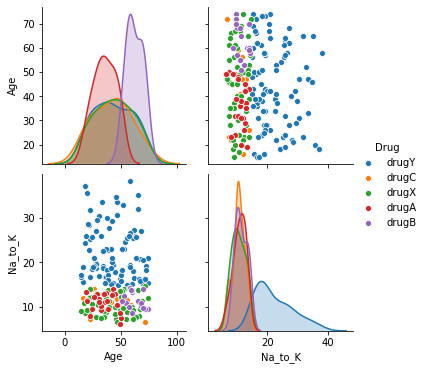

In [12]:
sns.pairplot(df, hue='Drug')

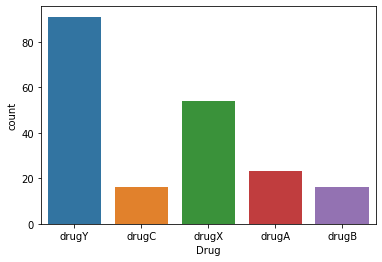

In [13]:
sns.countplot(x=df['Drug'], data=df)

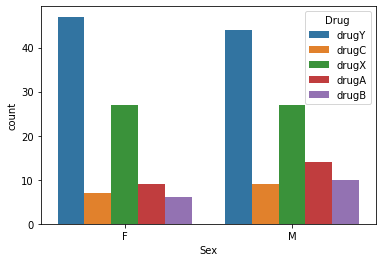

In [14]:
sns.countplot(x='Sex', hue='Drug', data=df)

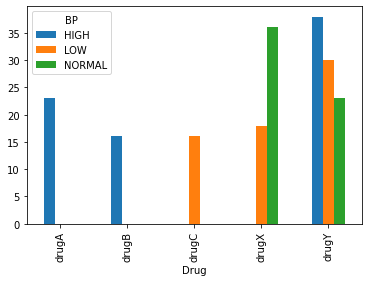

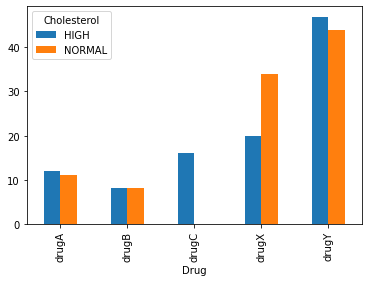

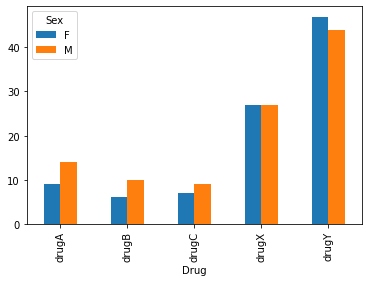

In [15]:
df.groupby('Drug')['BP'].value_counts().unstack().plot.bar()
df.groupby('Drug')['Cholesterol'].value_counts().unstack().plot.bar()
df.groupby('Drug')['Sex'].value_counts().unstack().plot.bar()

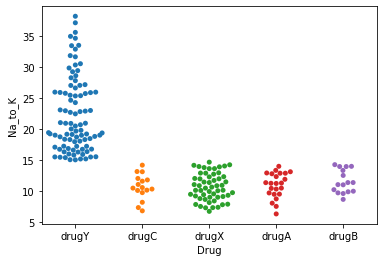

In [16]:
sns.swarmplot(x='Drug', y='Na_to_K', data=df)

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = ['Sex', 'BP', 'Cholesterol', 'Drug']
for features in cols:
    df[features] = le.fit_transform(df[features])

In [18]:
from sklearn.model_selection import train_test_split
X = df.drop('Drug', axis=1)
y = df['Drug']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Logistic Regression:**

In [20]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [21]:
lr_pred = lr.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, lr_pred)*100,'%')

88.33333333333333 %


**Gradient Booster Classifier:**

In [23]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [24]:
gbc_pred = gbc.predict(X_test)

In [25]:
print(accuracy_score(y_test,gbc_pred)*100,'%')

100.0 %


**Decision tree Classifier:**

In [26]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [27]:
dtc_pred = dtc.predict(X_test)

In [28]:
print(accuracy_score(y_test, dtc_pred)*100,'%')

100.0 %


**Random Forest Classifier:**

In [29]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, criterion = 'entropy', random_state=22)
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=22)

In [30]:
rfc_pred = rfc.predict(X_test)

In [31]:
print(accuracy_score(y_test, rfc_pred)*100,'%')

100.0 %
